In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.neighbors import NearestNeighbors

In [34]:
data = pd.read_csv("data/csv/still/0/wo_7_6_0.csv")

data.head()

,timestamps,csi_len,channel,err_info,noise_floor,rate,bandWidth,num_tones,nr,nc,...,payload_length,block_length,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,with_receiver,coord1,coord2
0,3985903916,560,2437,0,0,141,0,56,2,2,...,1320,1904,1,215.102301,145.838952,0.139925,-2.791650,0,7,6
1,3985903916,560,2437,0,0,141,0,56,2,2,...,1320,1904,2,173.769963,153.000000,1.362115,-2.060754,0,7,6
2,3985903916,560,2437,0,0,141,0,56,2,2,...,1320,1904,3,222.643212,154.029218,0.121569,-2.838320,0,7,6
3,3985903916,560,2437,0,0,141,0,56,2,2,...,1320,1904,4,181.686543,157.155973,1.343172,-2.082839,0,7,6
4,3985903916,560,2437,0,0,141,0,56,2,2,...,1320,1904,5,226.797266,162.640708,0.083874,-2.854847,0,7,6


In [35]:
variances = data.var()
print(variances)

low_variance_cols = variances[variances < 5e-3].index.tolist()
print("Columns with low or zero variance:")
print(low_variance_cols)

timestamps        5.228084e+10
csi_len           2.338147e+03
channel           0.000000e+00
err_info          0.000000e+00
noise_floor       0.000000e+00
rate              1.803751e+00
bandWidth         0.000000e+00
num_tones         0.000000e+00
nr                0.000000e+00
nc                2.982330e-02
rssi              6.435879e+00
rssi1             6.016497e+00
rssi2             8.440885e+00
rssi3             0.000000e+00
payload_length    1.701670e+04
block_length      1.992639e+04
subcarriers       2.612572e+02
ant1_amplitude    1.378417e+03
ant2_amplitude    4.012753e+03
ant1_phase        3.267398e+00
ant2_phase        3.439723e+00
with_receiver     0.000000e+00
coord1            0.000000e+00
coord2            0.000000e+00
dtype: float64
Columns with low or zero variance:
['channel', 'err_info', 'noise_floor', 'bandWidth', 'num_tones', 'nr', 'rssi3', 'with_receiver', 'coord1', 'coord2']


In [36]:
data.drop(low_variance_cols, axis=1, inplace=True)
data.drop(['csi_len', 'rate', 'payload_length', 'block_length'], axis=1, inplace=True)
data.drop('timestamps', axis=1, inplace=True)
data.head()

,nc,rssi,rssi1,rssi2,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase
0,2,59,53,58,1,215.102301,145.838952,0.139925,-2.791650
1,2,59,53,58,2,173.769963,153.000000,1.362115,-2.060754
2,2,59,53,58,3,222.643212,154.029218,0.121569,-2.838320
3,2,59,53,58,4,181.686543,157.155973,1.343172,-2.082839
4,2,59,53,58,5,226.797266,162.640708,0.083874,-2.854847


In [37]:
# features_to_scale = ['csi_len', 'payload_length', 'block_length', 'ant1_amplitude', 'ant2_amplitude', 'ant1_phase', 'ant2_phase', 'rssi', 'rssi1', 'rssi2']
features_to_scale = ['ant1_phase', 'ant2_phase', 'rssi', 'rssi1', 'rssi2']
scaler = StandardScaler()

# Apply standardization on features
# data = data_cleaned.copy()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])
data.head()

,nc,rssi,rssi1,rssi2,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase
0,2,-1.271101,-1.486514,-0.864209,1,215.102301,145.838952,0.052127,-1.481610
1,2,-1.271101,-1.486514,-0.864209,2,173.769963,153.000000,0.728278,-1.087516
2,2,-1.271101,-1.486514,-0.864209,3,222.643212,154.029218,0.041973,-1.506774
3,2,-1.271101,-1.486514,-0.864209,4,181.686543,157.155973,0.717799,-1.099424
4,2,-1.271101,-1.486514,-0.864209,5,226.797266,162.640708,0.021118,-1.515685


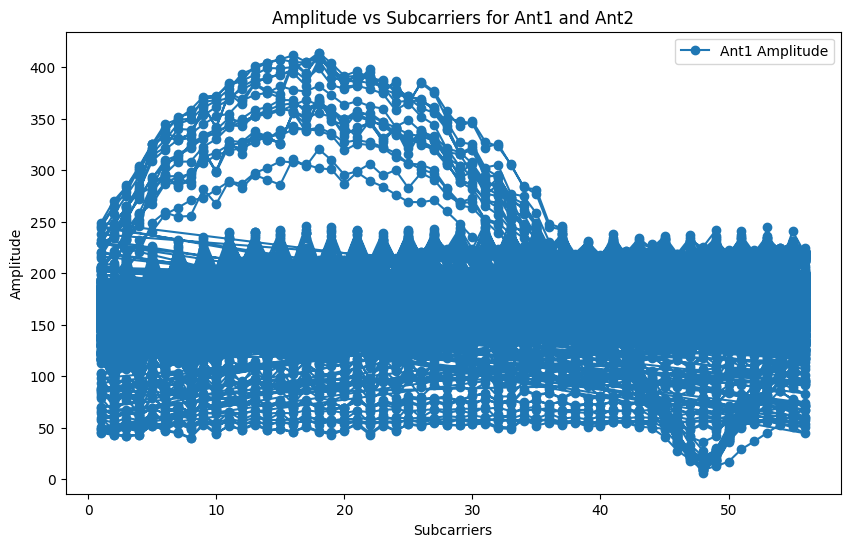

In [38]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Ant1 and Ant2 amplitudes
plt.plot(data["subcarriers"], data["ant1_amplitude"], label="Ant1 Amplitude", marker='o')
# plt.plot(data["subcarriers"], data["ant2_amplitude"], label="Ant2 Amplitude", marker='x')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Amplitude vs Subcarriers for Ant1 and Ant2")
plt.legend()

# Show the plot
plt.show()

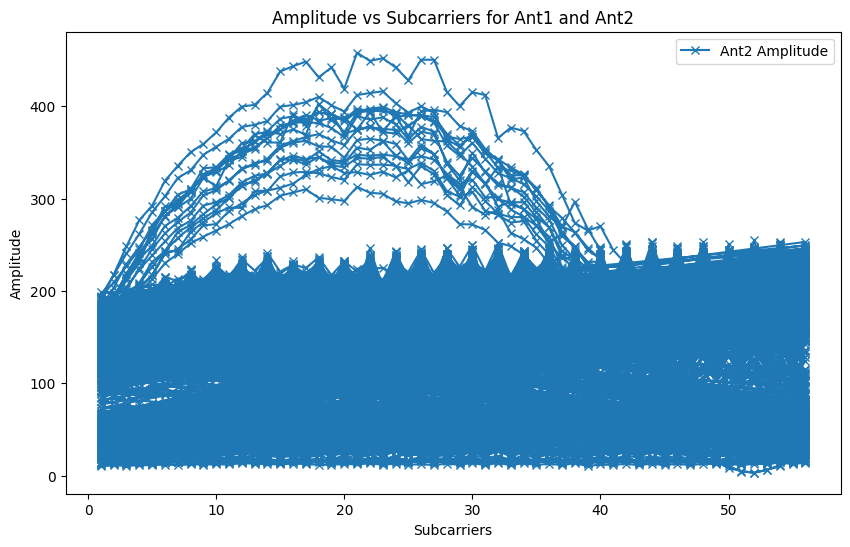

In [39]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Ant1 and Ant2 amplitudes
# plt.plot(data["subcarriers"], data["ant1_amplitude"], label="Ant1 Amplitude", marker='o')
plt.plot(data["subcarriers"], data["ant2_amplitude"], label="Ant2 Amplitude", marker='x')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Amplitude vs Subcarriers for Ant1 and Ant2")
plt.legend()

# Show the plot
plt.show()

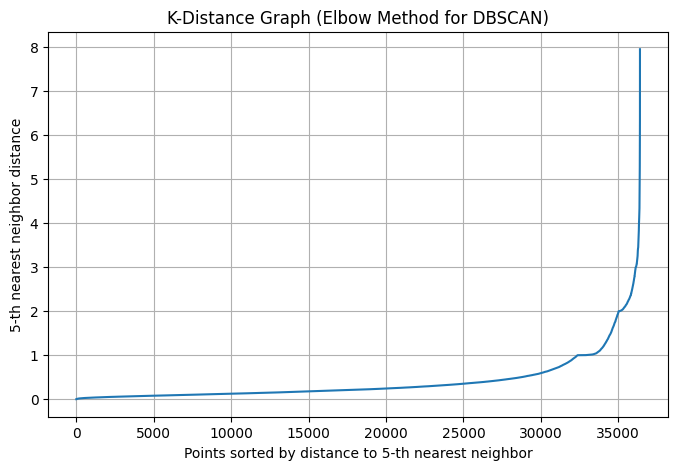

In [40]:
# Step 1: Extract your data (using the amplitude data as an example)
X = data[['subcarriers', 'ant1_amplitude']].values

# Step 2: Use Nearest Neighbors to find the k nearest neighbors
k = 5  # min_samples - 1 for DBSCAN, for example, min_samples = 5, so k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Step 3: Sort the distances to the k-th nearest neighbor
# The distance to the k-th nearest neighbor is in the last column (index k-1)
k_distances = distances[:, k-1]
k_distances = np.sort(k_distances)

# Step 4: Plot the sorted k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance to {}-th nearest neighbor'.format(k))
plt.ylabel('{}-th nearest neighbor distance'.format(k))
plt.title('K-Distance Graph (Elbow Method for DBSCAN)')
plt.grid(True)
plt.show()

In [41]:
# def find_optimal_eps(data, MinPts=5):
#     # Compute the pairwise distance matrix
#     data_dist_matrix = pdist(data)
#     data_dist_matrix = squareform(data_dist_matrix)
    
#     n1 = data.shape[0]

#     # Sort distances to find the MinPts+1 nearest distances for each point
#     sorted_distances = np.sort(data_dist_matrix, axis=1)
#     k_distances = sorted_distances[:, MinPts]

#     # Sort and find the distance values for plotting
#     dist_eps = np.sort(k_distances)

#     # Create a K-distance plot to help find Eps value
#     plt.plot(range(1, len(dist_eps) + 1), dist_eps)
#     plt.xlabel("Points")
#     plt.ylabel(f"{MinPts}-Distance")
#     plt.title("K-Distance Graph")
#     plt.show()

#     # Find the optimal Eps by identifying a steep change in the curve
#     eps_diffs = np.diff(dist_eps)
#     highnumb_index = np.argmax(eps_diffs)  # Find the point where the curve has the steepest increase
#     eps = (dist_eps[highnumb_index] + dist_eps[highnumb_index + 1]) / 2

#     print(f"Optimal Eps value: {eps}")
#     return eps

# eps_values = find_optimal_eps(data)

In [66]:
amplitudes = data[['subcarriers', 'ant1_amplitude']].values
dbscan = hdbscan.HDBSCAN(min_samples=100, core_dist_n_jobs=-1)
# dbscan = DBSCAN(eps=1, min_samples=5)

In [67]:
dbscan.fit(amplitudes)

HDBSCAN(core_dist_n_jobs=-1, min_samples=100)

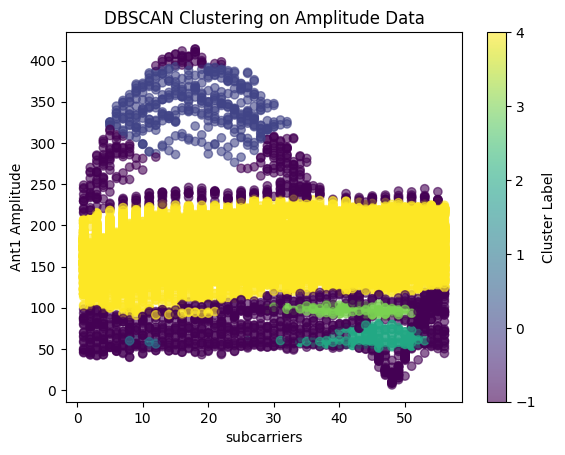

In [68]:
data['cluster'] = dbscan.labels_

data.head()

# Step 5: Visualize the clusters
plt.scatter(data['subcarriers'], data['ant1_amplitude'], c=data['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('subcarriers')
plt.ylabel('Ant1 Amplitude')
plt.title('DBSCAN Clustering on Amplitude Data')
plt.colorbar(label='Cluster Label')
plt.show()

In [69]:
data.head()

,nc,rssi,rssi1,rssi2,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,cluster
0,2,-1.271101,-1.486514,-0.864209,1,215.102301,145.838952,0.052127,-1.481610,-1
1,2,-1.271101,-1.486514,-0.864209,2,173.769963,153.000000,0.728278,-1.087516,4
2,2,-1.271101,-1.486514,-0.864209,3,222.643212,154.029218,0.041973,-1.506774,-1
3,2,-1.271101,-1.486514,-0.864209,4,181.686543,157.155973,0.717799,-1.099424,4
4,2,-1.271101,-1.486514,-0.864209,5,226.797266,162.640708,0.021118,-1.515685,-1


In [70]:
cleaned_data = data.drop(data[data.cluster < 0].index)
cleaned_data.head()

,nc,rssi,rssi1,rssi2,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,cluster
1,2,-1.271101,-1.486514,-0.864209,2,173.769963,153.000000,0.728278,-1.087516,4
3,2,-1.271101,-1.486514,-0.864209,4,181.686543,157.155973,0.717799,-1.099424,4
5,2,-1.271101,-1.486514,-0.864209,6,188.223272,164.258942,0.701069,-1.155860,4
7,2,-1.271101,-1.486514,-0.864209,8,193.227845,168.600119,0.672063,-1.169666,4
9,2,-1.271101,-1.486514,-0.864209,10,204.628932,181.135309,0.656320,-1.149463,4


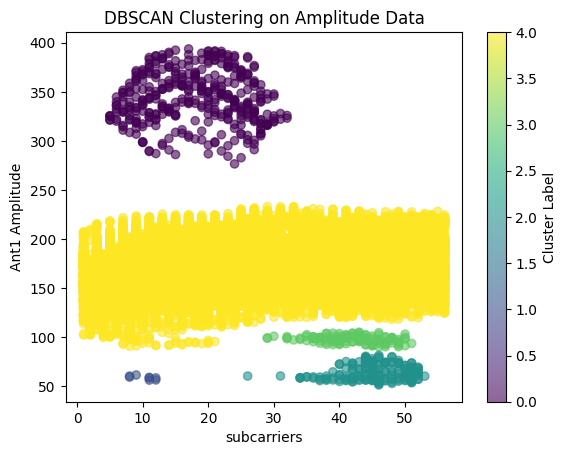

In [71]:
plt.scatter(cleaned_data['subcarriers'], cleaned_data['ant1_amplitude'], c=cleaned_data['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('subcarriers')
plt.ylabel('Ant1 Amplitude')
plt.title('DBSCAN Clustering on Amplitude Data')
plt.colorbar(label='Cluster Label')
plt.show()

In [72]:

# from sklearn.metrics import silhouette_score


# score = silhouette_score(data, dbscan.labels_)
# print(score)

# from sklearn.metrics import davies_bouldin_score
# score = davies_bouldin_score(data, dbscan.labels_)
# print(f"Davies-Bouldin Score: {score}")

# from sklearn.metrics import calinski_harabasz_score
# score = calinski_harabasz_score(data, dbscan.labels_)
# print(f"Calinski-Harabasz Score: {score}")


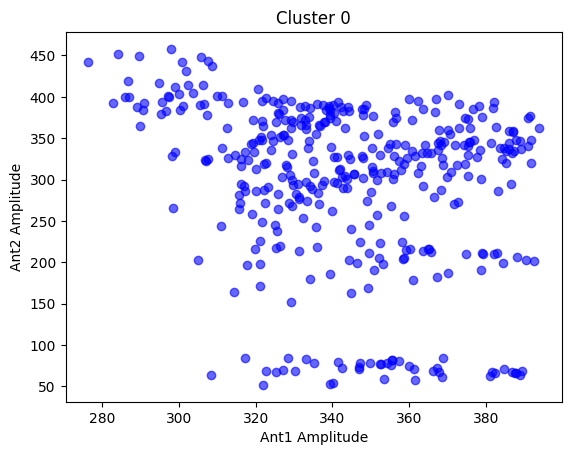

In [73]:
import matplotlib.pyplot as plt

# Extract points from Cluster 0
cluster_0_points = data[data.cluster == 0]

# Plot Cluster 0
plt.scatter(cluster_0_points['ant1_amplitude'], cluster_0_points['ant2_amplitude'], c='blue', alpha=0.6)
plt.xlabel('Ant1 Amplitude')
plt.ylabel('Ant2 Amplitude')
plt.title('Cluster 0')
plt.show()
